# Nonlinear Transformations

The real world is filled with non-linearities and so dealing with it often requires nonlinear computation. This model shows how to compute nonlinear functions using Nengo 2.0. The two nonlinear functions demonstrated in this model are 'multiplication' and 'squaring'.

In [1]:
# Setup the environment
import matplotlib.pyplot as plt
%matplotlib inline

import nengo
from nengo.dists import Choice
from nengo.utils.functions import piecewise

## Create the Model

The parameters of the model are as described in the book. The model has five ensembles: two input ensembles (`X` and `Y`), a 2D combined ensemble (`vector2D`), and the output ensembles `result_square` and `result_product` which store the square and product of the inputs respectively. 

Two varying scalar values are used for the two input signals that drive activity in ensembles A and B. For multiplication, you will project both inputs independently into a 2D space, and then decode a nonlinear transformation of that space (i.e., the product) into an ensemble (`result_product`). The model also squares the value of the first input (`inputX`) encoded in an ensemble (X), in the output of another ensemble (`result_square`). 

The two functions `product(x)` and `square(x)` are defined to serve the same purpose as entering the expressions in the "Expression" field in the "User-defined Function" dialog box in Nengo 1.4 as described in the book.



In [2]:
model = nengo.Network(label='Nonlinear Function')
with model:
    #Input - Piecewise step functions
    inputX = nengo.Node(piecewise({0: -0.75, 1.25: 0.5, 2.5: -0.75, 3.75: 0}))
    inputY= nengo.Node(piecewise({0: 1, 1.25: 0.25, 2.5: -0.25, 3.75: 0.75}))
    
    #Five ensembles containing LIF neurons
    X = nengo.Ensemble(100, dimensions=1, radius=1)               # Represents inputX
    Y = nengo.Ensemble(100, dimensions=1, radius=1)               # Represents inputY
    vector2D = nengo.Ensemble(224, dimensions=2, radius=2)        # 2D combined ensemble
    result_square = nengo.Ensemble(100, dimensions=1, radius=1)   # Represents the square of X
    result_product = nengo.Ensemble(100, dimensions=1, radius=1)  # Represents the product of X and Y
    
    #Connecting the input nodes to the appropriate ensembles
    nengo.Connection(inputX, X)
    nengo.Connection(inputY, Y)
    
    #Connecting input ensembles A and B to the 2D combined ensemble
    nengo.Connection(X, vector2D[0])
    nengo.Connection(Y, vector2D[1])
    
    #Defining a function that computes the product of two inputs
    def product(x):
        return x[0] * x[1]
    
    #Defining the squaring function
    def square(x):
        return x[0] * x[0]
    
    #Connecting the 2D combined ensemble to the result ensemble 
    nengo.Connection(vector2D, result_product, function=product)
    
    #Connecting ensemble A to the result ensemble
    nengo.Connection(X, result_square, function=square)

## Step 5: Run the Model

In [ ]:
#Import the nengo_gui visualizer to run and visualize the model.
from nengo_gui.ipython import IPythonViz
IPythonViz(model, "non_linear.py.cfg")

Press the play button in the visualizer to run the simulation. You should see the graphs as shown in the figure below.

The input signals chosen clearly show that the model works well. The result_product graph shows the product of the `inputX` & `inputY`, and the `result_square` graph shows the squre of `inputX`. You can see in the graphs that when inputX is zero, both the product and the square are also zero. You can use the sliders to change the input values provided by the `inputX` and `inputY` nodes to test the model.

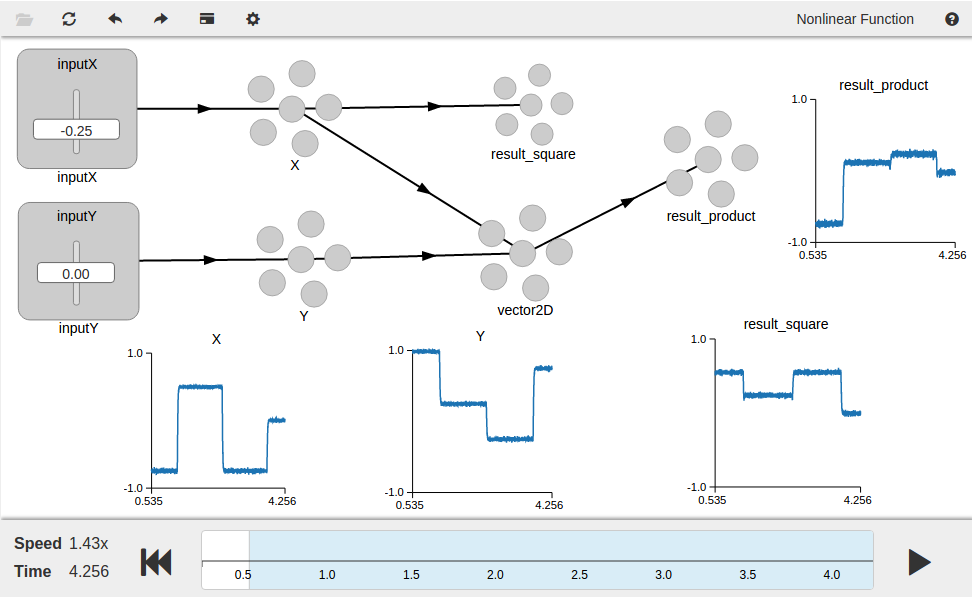

In [5]:
from IPython.display import Image
Image(filename='non_linear.png')